In [7]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sqlalchemy import create_engine, text

In [3]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'1234' 
port = r'5433' 
schema = r'raw'

In [4]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [5]:
schema = "raw"  
table_name = "HeartDisease"  

sql = f'SELECT * FROM "{schema}"."{table_name}"'

data_check = pd.read_sql(sql, db_conn, index_col=None)
print(data_check.head())  

   age  sex  cp trestbps  chol fbs restecg thalach exang oldpeak slope ca   
0   32    1   1       95     0   ?       0     127     0      .7     1  ?  \
1   34    1   4      115     0   ?       ?     154     0      .2     1  ?   
2   35    1   4        ?     0   ?       0     130     1       ?     ?  ?   
3   36    1   4      110     0   ?       0     125     1       1     2  ?   
4   38    0   4      105     0   ?       0     166     0     2.8     1  ?   

  thal  num  
0    ?    1  
1    ?    1  
2    7    3  
3    6    1  
4    ?    2  


In [8]:
df = data_check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       246 non-null    int64 
 1   sex       246 non-null    int64 
 2   cp        246 non-null    int64 
 3   trestbps  246 non-null    object
 4   chol      246 non-null    int64 
 5   fbs       246 non-null    object
 6   restecg   246 non-null    object
 7   thalach   246 non-null    object
 8   exang     246 non-null    object
 9   oldpeak   246 non-null    object
 10  slope     246 non-null    object
 11  ca        246 non-null    object
 12  thal      246 non-null    object
 13  num       246 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 27.0+ KB


In [10]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
5,38,0,4,110,0,0,0,156,0,0,2,?,3,1
6,38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
7,38,1,3,115,0,0,0,128,1,0,2,?,7,1
8,38,1,4,135,0,?,0,150,0,0,?,?,3,2
9,38,1,4,150,0,?,0,120,1,?,?,?,3,1


In [11]:
df.tail(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
231,65,1,4,145,0,?,1,67,0,?,?,?,6,3
232,65,1,4,155,0,?,0,154,0,1,1,?,?,0
233,65,1,4,160,0,1,1,122,0,?,?,?,7,3
234,66,0,4,155,0,?,0,90,0,0,?,?,7,1
235,66,1,4,150,0,0,0,108,1,2,2,?,7,3
236,67,1,1,145,0,0,2,125,0,0,2,?,3,2
237,68,1,4,135,0,0,1,120,1,0,1,?,7,3
238,68,1,4,145,0,?,0,136,0,1.8,1,?,?,1
239,69,1,4,135,0,0,0,130,0,0,2,?,6,1
240,69,1,4,?,0,0,1,?,?,?,?,?,7,3


It seems like the dataset have so many missing values, so lets start with trestbps(i.e Resting Blood Pressure in mm/hg).

In [13]:
clean_data = df.copy()

Since all missing values are seems to be represented by '?' so let me change these to NaN.

In [20]:
clean_data.replace('?', np.nan, inplace=True)

In [21]:
clean_data.trestbps.unique()

array(['95', '115', nan, '110', '105', '100', '135', '150', '125', '145',
       '140', '155', '160', '120', '130', '165', '80', '180', '170',
       '200', '185'], dtype=object)

In [22]:
clean_data['trestbps'].isna().sum()


4

Well I have, four missing value in resting bolld pressure coulmn so I will delete these

In [23]:
clean_data = clean_data.dropna(subset=['trestbps'])


In [24]:
clean_data['trestbps'].isna().sum()


0

In [25]:
clean_data['fbs'].isna().sum()


148

Most of the colums has missing values and dropping all the rows that has missing value may create issue for a small dataset like this, so handeling the missing values by filling the relevent data


In [26]:
clean_data.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs         148
restecg       2
thalach       0
exang         0
oldpeak       8
slope        30
ca          232
thal        104
num           0
dtype: int64

We can see that we have missing value in fbs, restecg, slope, oldpeak, ca and thal

Since, oldpeak is a numeric value so lets generate the missing values using KNN.

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [30]:
knn_imputer = KNNImputer(n_neighbors=5)
clean_data[['oldpeak']] = knn_imputer.fit_transform(clean_data[['oldpeak']])


In [31]:
clean_data[['oldpeak']].isna().sum()

oldpeak    0
dtype: int64

Since, ca (Number of major vessels (0-3) colored by fluoroscopy) has 232 missing value out of 242 dataset, so lets drop this column

In [32]:
clean_data.drop(columns=['ca'], inplace=True)

Now, lets clean cloumns fbs, slope, thal.
Since, these are boolean or categorical data so lets fill missing value using Mode.




In [33]:
mode_imputer = SimpleImputer(strategy='most_frequent')
clean_data[['fbs', 'slope', 'thal']] = mode_imputer.fit_transform(clean_data[['fbs', 'slope', 'thal']])

In [34]:
clean_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     2
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Since, restecg has only 2 value missing so lets remoce these rows.

In [35]:
clean_data = clean_data.dropna(subset=['restecg'])


In [36]:
clean_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

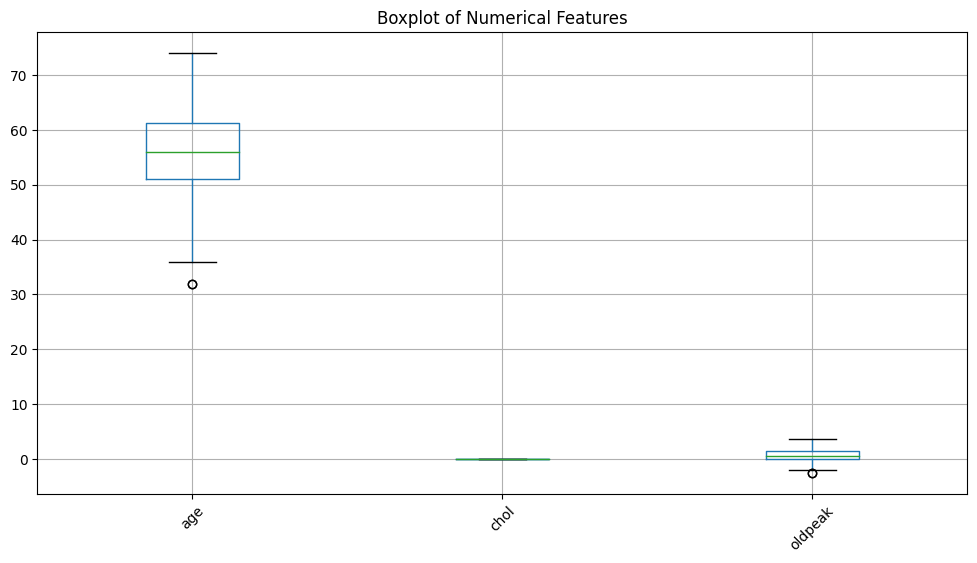

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features
plt.figure(figsize=(12,6))
clean_data[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [45]:
from scipy import stats

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers[col] = (z_scores > threshold).sum()
    return outliers

# Apply Z-score method
numeric_cols = ['oldpeak']
zscore_outliers = detect_outliers_zscore(clean_data, numeric_cols)
print("Outliers detected using Z-score:", zscore_outliers)


Outliers detected using Z-score: {'oldpeak': 2}


In [47]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        df = df[z_scores < threshold]
    return df

# Apply Z-score method to remove outliers
numeric_cols = ['oldpeak']

clean_data = remove_outliers_zscore(clean_data, numeric_cols)

In [50]:
table_name = r'HeartDisease'
schema = r'Cleaned' # schema we created this week.

clean_data.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

238

In [51]:
schema = "Cleaned"  
table_name = "HeartDisease"  

sql = f'SELECT * FROM "{schema}"."{table_name}"'

data_check = pd.read_sql(sql, db_conn, index_col=None)
print(data_check.head())  

   age  sex  cp trestbps  chol fbs restecg thalach exang  oldpeak slope thal   
0   32    1   1       95     0   0       0     127     0      0.7     1    7  \
1   36    1   4      110     0   0       0     125     1      1.0     2    6   
2   38    0   4      105     0   0       0     166     0      2.8     1    7   
3   38    0   4      110     0   0       0     156     0      0.0     2    3   
4   38    1   3      100     0   0       0     179     0     -1.1     1    7   

   num  
0    1  
1    1  
2    2  
3    1  
4    0  
